# House Prices Predictor

Aim: Use Machine Learning Techniques to develop a model to predict housing prices, evaluate and improve the model's accuracy through feature engineering. 

Keywords: Machine Learning, Feature Engineering, Feature Selection, Cross Validation, K-fold

Dataset: Working with housing data for the city of Ames, Iowa, United States from 2006 to 2010. The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values.

## Setup

In [296]:
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import seaborn as sns

In [297]:
# read in the data
ames = pd.read_csv("AmesHousing.tsv", delimiter="\t")

In [298]:
# functions to tranform and select features
def transform_features(df):
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

# Returns the root mean square error
def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    
    # Specify column types and return only those columns as a data frame.
    # Select numeric columns
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## Remove dependent/output variable from the feature variables
    features = numeric_train.columns.drop("SalePrice")

    # train a model using the train set
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])

    # make predictions by testing on the test set
    predictions = lr.predict(test[features])

    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

# first few rows of the dataset
ames[:5]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Apply the functions to the ames dataset. Note that for now the model will use only the one feature, 'Gr Liv Area', to train and test for prediction accuracy. This accuracy will be improved through this analysis.

In [299]:
df = transform_features(ames)
df = select_features(df)
# Returns the root mean squared deviation
og_rmse = train_and_test(df)

print("Initial RMSE:", og_rmse) # Display RMSE

Initial RMSE: 57088.25161263909


### Feature Engineering

### Data Cleaning 

- The data with handle missing values where:
    - All columns:
        - Drop any with 5% or more missing values.
    - Text columns:
        - Drop any with 1 or more missing values .
    - Numerical columns:
        - For columns with missing values, fill in with the most common value in that column

1: All columns: drop any with 5% or more missing values.

In [300]:
## Series object: column name -> number of missing values
num_missing = nacounts = ames.isnull().sum()

# Filter Series to columns containing >5% missing values
drop_missing_cols = num_missing[(num_missing > len(ames)/20)].sort_values()

# Drop those columns from the data frame. 
ames_clean = ames.drop(drop_missing_cols.index, axis=1)

In [301]:
# Display the top 20 features with the most number of missing values
print("[TOP 20 FEATURES WITH MOST # OF MISSING VALS.]")
print(num_missing.sort_values(ascending = False).head(20))

print("\n")

# Display the dropped columns 
print("[COLUMNS TO DROP]")
print(drop_missing_cols.sort_values(ascending = False))


[TOP 20 FEATURES WITH MOST # OF MISSING VALS.]
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
dtype: int64


[COLUMNS TO DROP]
Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Mas Vnr Type     1775
Fireplace Qu     1422
Lot Frontage      490
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Garage Type       157
dtype: int64


2: Text columns: drop any with 1 or more missing values.

In [302]:
## Series object: column name -> number of missing values
text_mv_counts = ames_clean.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

## Filter Series to columns containing *any* missing values
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]

# Drop those columns from the data frame. 
ames_clean = ames_clean.drop(drop_missing_cols_2.index, axis=1)

In [303]:
# Display the top 20 text features with the most number of missing values
print("[TEXT FEATURES # OF MISSING VALUES]")
print(text_mv_counts.sort_values(ascending = False))

print("\n")

# Display the dropped columns
print("[COLUMNS TO DROP]")
print(drop_missing_cols_2.sort_values(ascending = False))

[TEXT FEATURES # OF MISSING VALUES]
Bsmt Exposure     83
BsmtFin Type 2    81
BsmtFin Type 1    80
Bsmt Cond         80
Bsmt Qual         80
Electrical         1
Condition 1        0
Roof Style         0
House Style        0
Bldg Type          0
Condition 2        0
Lot Config         0
Neighborhood       0
Land Slope         0
Exterior 1st       0
Utilities          0
Land Contour       0
Lot Shape          0
Roof Matl          0
Exter Qual         0
Exterior 2nd       0
Street             0
Foundation         0
Heating            0
Heating QC         0
Central Air        0
Kitchen Qual       0
Functional         0
Paved Drive        0
Sale Type          0
Exter Cond         0
MS Zoning          0
Sale Condition     0
dtype: int64


[COLUMNS TO DROP]
Bsmt Exposure     83
BsmtFin Type 2    81
BsmtFin Type 1    80
Bsmt Cond         80
Bsmt Qual         80
Electrical         1
dtype: int64


3: Numerical columns: for columns with missing values, fill in with the most common value in that column

In [304]:
## Compute column-wise missing value counts
num_missing = ames_clean.select_dtypes(include=['int', 'float']).isnull().sum()
fixable_numeric_cols = num_missing[(num_missing < len(ames_clean)/20) & (num_missing > 0)].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [305]:
## Compute the most common value for each column in `fixable_nmeric_missing_cols`.
replacement_values_dict = ames_clean[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
replacement_values_dict

{'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Mas Vnr Area': 0.0}

In [306]:
## Use `pd.DataFrame.fillna()` to replace missing values.
ames_clean = ames_clean.fillna(replacement_values_dict)

In [307]:
## Verify that every column has 0 missing values
ames_clean.isnull().sum().value_counts()

0    64
Name: count, dtype: int64

Edited the features variables, additional feature variables, Years Before Sale and Years Since Remod. The Years Since Remod is the difference between Year remodelled (the later value) and Year Built (the earlier value). Both of these are not categorical, but the numeric values are not inherently useful in a linear regression model either: the former describes the year the house was last sold and the latter, the year the house was built. These features additional information to be considered.

In [308]:
years_sold = ames_clean['Yr Sold'] - ames_clean['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [309]:
years_since_remod = ames_clean['Yr Sold'] - ames_clean['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [310]:
## Create new columns
ames_clean['Years Before Sale'] = years_sold
ames_clean['Years Since Remod'] = years_since_remod

## Drop rows with negative values for both of these new features
ames_clean = ames_clean.drop([1702, 2180, 2181], axis=0)

## No longer need original year columns
ames_clean = ames_clean.drop(["Year Built", "Year Remod/Add"], axis = 1)

<Axes: title={'center': 'Boxplot of Years Since Remodeled'}>

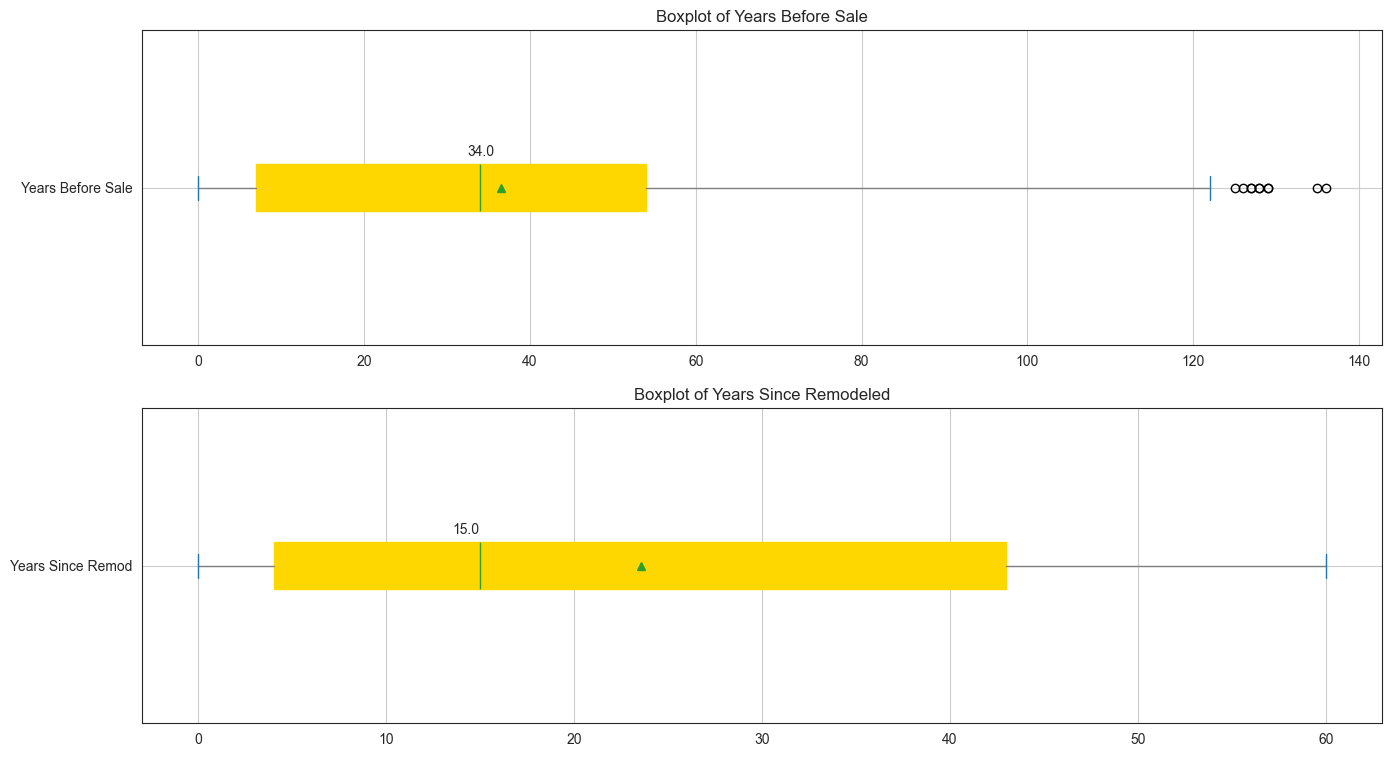

In [311]:
# quick plot of both
median_yus = ames_clean["Years Before Sale"].median()
median_yur = ames_clean["Years Since Remod"].median()

fig = plt.figure(figsize = (16, 9))

ax1 = plt.subplot(2, 1, 1)
ax1.set_title("Boxplot of Years Before Sale")
ax1.text(median_yus-1.5, 1.1, median_yus)

ax2 = plt.subplot(2, 1, 2)
ax2.set_title("Boxplot of Years Since Remodeled")
ax2.text(median_yur-1.5, 1.1, median_yur)

boxprops = dict(boxes = "gold", whiskers = "gray")

# ames_clean.boxplot(["years_until_sold"], ax = ax1, vert = False, showmeans = True, grid = True)
# ames_clean.boxplot(["years_until_remod"], ax = ax2, vert = False, showmeans = True, grid = True)

ames_clean["Years Before Sale"].plot.box(vert = False, showmeans = True, 
                                        grid = True, color = boxprops, 
                                        patch_artist = True, ax = ax1)

ames_clean["Years Since Remod"].plot.box(vert = False, showmeans = True, 
                                        grid = True, color = boxprops, 
                                        patch_artist = True, ax = ax2)

After looking at the column documentation, columns are dropped where they are not useful for the regression, and columns that leak data about the final sale. 

In [312]:
## Drop columns that aren't useful for ML
ames_clean = ames_clean.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
ames_clean = ames_clean.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

The transform features method is updated, which improves the root mean squared deviation.

In [313]:
# Transform dataset into features variables
def transform_features(df):
    # Drop columns that more than 5% missing vals
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    # Drop text columns with at least 1 missing value  
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    # Impute mode for numeric columns
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    # Create Years Before Sale and Years Since Remod
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)

    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a DataFrame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

55275.36731241307

### Feature Selection
While the RMSE is better than the initial one, the improvement was only marginal. Therefore, feature selection is performed.

Specifically, investigating the correlation coefficient between each feature and SalePrice, a statistic that describes the strength of their (positive/negative) linear relationship. 

In [314]:
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
numerical_df.head(5)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,2010,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,2010,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,2010,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,2010,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,2010,189900,13,12


In [315]:
# Get the absolute value of pairwise correlations and sort the vakyes
sorted_corrs = numerical_df.corr()["SalePrice"].abs().sort_values(ascending = False)

print("[TOP 10 HIGHLY CORRELATED FEATURES]")
sorted_corrs[sorted_corrs.index != "SalePrice"].head(10)

[TOP 10 HIGHLY CORRELATED FEATURES]


Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648361
Total Bsmt SF        0.644012
Garage Area          0.641425
1st Flr SF           0.635185
Years Before Sale    0.558979
Full Bath            0.546118
Years Since Remod    0.534985
Mas Vnr Area         0.506983
Name: SalePrice, dtype: float64

In [316]:
print("[HIGH CORR. NUMERIC FEATURES TO KEEP]")
print(sorted_corrs[(sorted_corrs.index != "SalePrice") 
                 & (sorted_corrs.values > 0.4)])

keep_corr = sorted_corrs[sorted_corrs.values > 0.4].index.tolist()
drop_corr = sorted_corrs[sorted_corrs.values <= 0.4].index.tolist()

## Drop columns with less than 0.4 correlation with SalePrice.
ames_clean = transform_df.drop(drop_corr, axis = 1)

[HIGH CORR. NUMERIC FEATURES TO KEEP]
Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648361
Total Bsmt SF        0.644012
Garage Area          0.641425
1st Flr SF           0.635185
Years Before Sale    0.558979
Full Bath            0.546118
Years Since Remod    0.534985
Mas Vnr Area         0.506983
TotRms AbvGrd        0.498574
Fireplaces           0.474831
BsmtFin SF 1         0.439284
Name: SalePrice, dtype: float64


Based on the heatmap below, all of the features except for years_since_sold and years_since_remod have a strong, positive linear relationship with SalePrice.

Since years_since_sold and years_since_remod are strongly negatively related, on the other hand, this means that the longer the time after the house was sold and remodelled, the lower the price gets.

The most correlated feature is Overall Qual, which rates the overall material and finish of the house. This however poses a problem since this is a categorical variable.

Statistically speaking, the concept of a correlation coefficient that measures the linear relationship between two features breaks down with categorical variables. Fortunately, since Overall Qual is an ordinal variable, its correlation with the continous dependent variable can still be computed and interpreted using the Spearman Rank Correlation Coefficient instead. This does not mean that the feature will not be helpful later on in our regression, only that we should be wary of how we interpret such statistics as below.

<Axes: title={'center': 'Heatmap of Pairwise Correlations'}>

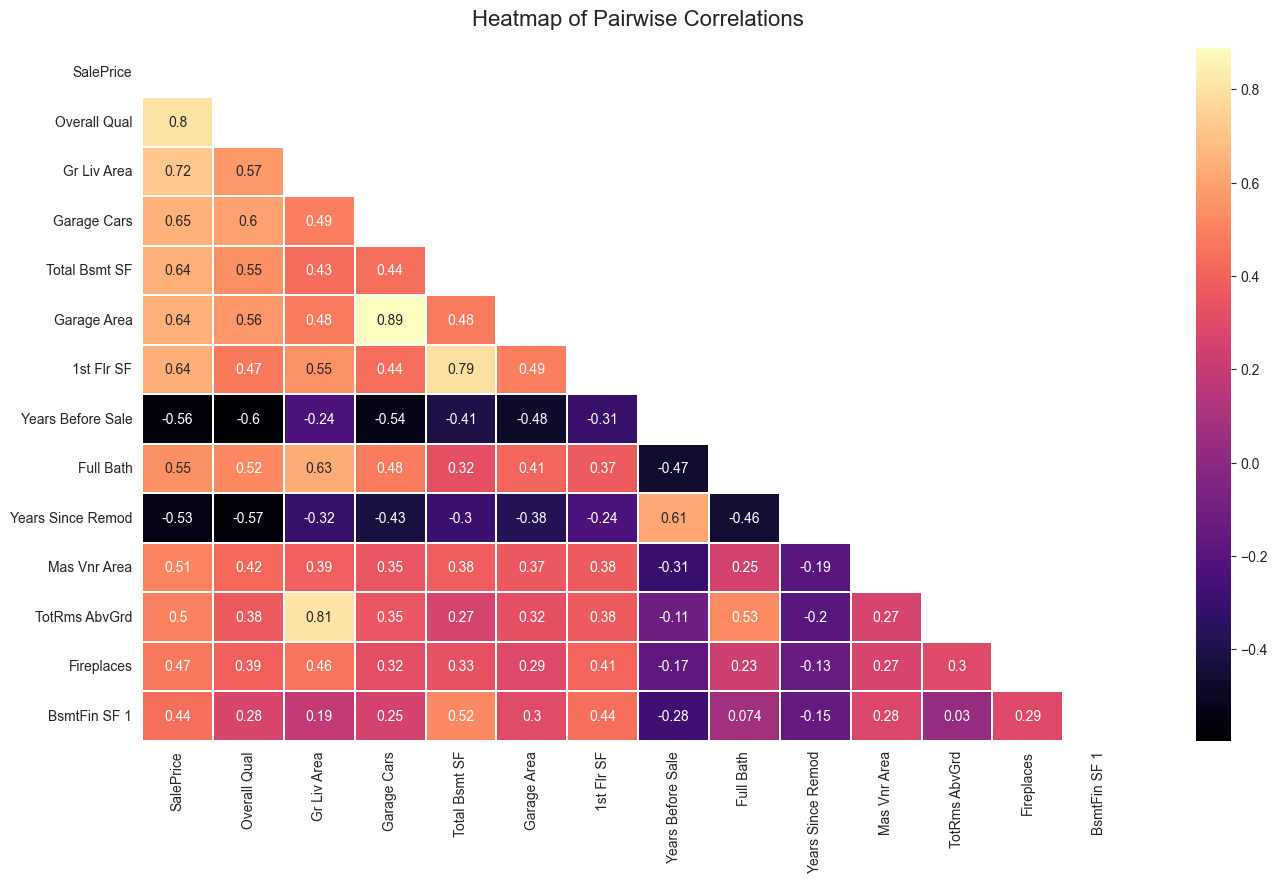

In [317]:
sns.set_style("white")

# Setup up axes
fig, ax3 = plt.subplots(figsize = (16, 9))
ax3.set_title("Heatmap of Pairwise Correlations", size = 16, y = 1.02)

# Mask upper triangle of off-diagonals
mask = np.zeros_like(ames_clean[keep_corr].corr())
mask[np.triu_indices_from(mask)] = True

# Generate heatmap
sns.heatmap(ames_clean[keep_corr].corr(), annot = True, linewidth = 0.2, ax = ax3,
            cmap = "magma", mask = mask)

The nominal features, or those that are discrete in nature and have no inherent ranking. The numerical columns are encoded into categorical variables. Columns with hundreds of unique values are dummy-coded, those hundreds of columns will need to be added back to the DataFrame.

In [318]:
## Create a list of column names from documentation that are meant to be categorical.
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [319]:
# Create a list of nominal features 
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

# Count the unique values in each categorical column
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()

# Aribtrary cutoff of 10 unique values
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index

# Drop nominal columns with many unique values
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

In [320]:
# Select only the remaining text columns, and convert to categorical
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')
    
# Create dummy columns, and drop original text columns
transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1).drop(text_cols,axis=1)

The select features method is updated, which improves the root mean squared deviation.

In [321]:
def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    # Selection by Correlation
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    
    # Drop weakly-correlated features
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    # Keep Nominal Features w/ # of Unique Values in Threshold
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    
    # 10 as arbitrary cutoff    
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    
    # Drop nominal columns with many unique values
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    # Get Dummy Variables
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')

    # Create dummy variables and drop original text columns
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)
    
    return df

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)

### Cross Validation 
The data is cross validated by performing k-fold validation. When comparing to the first root mean square error (RMSE), this RMSE is smaller, which indicates show the accuracy can be improved by at least 74%. Therefore, the relationship of overall quality and sale price should be investigated.

In [344]:
def train_and_test(df, k = 0):
    # Select numeric columns
    num_df   = df.select_dtypes(include = ["float", "integer"])
    features = num_df.columns.drop("SalePrice") # drop dependent variable
    lm = linear_model.LinearRegression()
    if k == 0:
        train = df[:1460]
        test  = df[1460:]
        
        # Train a model using the train set
        lm.fit(train[features], train["SalePrice"])

        # Make predictions by testing on the test set
        pred = lm.predict(test[features])

        # Return RMSE
        rmse = np.sqrt(mean_squared_error(test["SalePrice"], pred))
        print(">>> LOOCV RMSE:", rmse)
        return rmse
    
    if k == 1:
        # Shuffle rows
        df = df.sample(frac = 1).reset_index(drop = True)
        fold_one = df[:1460]
        fold_two = df[1460:]
        
        # Train with F1, Test with F2
        lm.fit(fold_one[features], fold_one["SalePrice"])
        pred_fit1 = lm.predict(fold_two[features])
        rmse_fit1 = np.sqrt(mean_squared_error(fold_two["SalePrice"], pred_fit1))

        # Train with F2, Test with F1
        lm.fit(fold_two[features], fold_two["SalePrice"])
        pred_fit2 = lm.predict(fold_one[features])
        rmse_fit2 = np.sqrt(mean_squared_error(fold_one["SalePrice"], pred_fit2))
        
        # Average the RMSEs
        print(">>>", k, "- Fold RMSE:", np.mean([rmse_fit1, rmse_fit2]))
        return np.mean([rmse_fit1, rmse_fit2])
    
    else:
        # Do K-Fold CV
        kf = KFold(n_splits = k, shuffle = True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test  = df.iloc[test_index]
            
            lm.fit(train[features], train["SalePrice"])
            pred = lm.predict(test[features])
            rmse = np.sqrt(mean_squared_error(test["SalePrice"], pred))
            rmse_values.append(rmse)
            print(train_index, ":", rmse)
        print(">>>", k, "- Fold RMSE:", np.mean(rmse_values))
        return np.mean(rmse_values)

transdf  = transform_features(ames)
selectdf = select_features(transdf)

rmse = train_and_test(selectdf, k = 10)
print("Accuracy increased by " + str(round(((og_rmse/rmse) - 1) * 100, 2)) + "%")

[   0    1    2 ... 2924 2925 2926] : 27872.98855734354
[   1    2    3 ... 2923 2924 2925] : 33430.64084748818
[   0    1    2 ... 2923 2925 2926] : 50635.64539639151
[   0    1    2 ... 2924 2925 2926] : 31663.232005296108
[   0    1    2 ... 2924 2925 2926] : 32470.53275299382
[   0    1    2 ... 2924 2925 2926] : 26075.59011827612
[   0    1    4 ... 2924 2925 2926] : 31427.922938085667
[   0    1    2 ... 2924 2925 2926] : 32334.762442789088
[   0    1    2 ... 2922 2924 2926] : 29514.92059079679
[   0    2    3 ... 2924 2925 2926] : 32599.47359661517
>>> 10 - Fold RMSE: 32802.57092460761
Accuracy increased by 74.04%
